In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [138]:
# Load the dataset
data = pd.read_csv('data.csv')
data.shape

(10000, 83)

## SVM

In [139]:
# Define a function to check if a row contains the string "X"
def contains_x(row):
    return any(cell == 'Error: value not found' for cell in row)

# Create a boolean mask indicating rows containing the string "X"
contains_error= data.apply(contains_x, axis=1)

# Drop rows containing the string "X" using the boolean mask
data = data.loc[~contains_error]

In [144]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
le = LabelEncoder()
data[data.columns[0]] = le.fit_transform(data[data.columns[0]])

In [145]:
data = data.astype(int)

In [146]:
# Split the data into features and target
X = data.iloc[:, :-1] # All columns except the last one
y = data["Click"]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(data.shape)
print(X_train.shape)
print(y_train.shape)

(9358, 83)
(7486, 82)
(7486,)


In [147]:
# Train the SVM classifier
svm_clf = Pipeline([("scaler",StandardScaler()),("linear_svc", LinearSVC(C=1, loss="hinge"))])
svm_clf.fit(X_train, y_train)

/Users/leonardbrenk/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [150]:
predictions = svm_clf.predict(X_test)
type(predictions)

numpy.ndarray

In [152]:
confusion_matrix(y_test, predictions)

array([[1620,   22],
       [  33,  197]])

In [157]:
print("precision score: \t" + str(precision_score(y_test, predictions)))
print("recall score: \t \t" + str(recall_score(y_test, predictions)))

precision score: 	0.8995433789954338
recall score: 	 	0.8565217391304348


In [159]:
print("F1 score: " + str(f1_score(y_test, predictions)))

F1 score: 0.8775055679287305


## Random Forest

In [161]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train,y_train)

RandomForestClassifier()

In [162]:
predictions_rnd = rnd_clf.predict(X_test)

In [178]:
# confusion matrix 
print("confusion matrix: \t" + str(confusion_matrix(y_test, predictions_rnd)))

# precision and recall
print("precision score: \t" + str(precision_score(y_test, predictions_rnd)))
print("recall score: \t \t" + str(recall_score(y_test, predictions_rnd)))

#F1
print("F1 score: " + str(f1_score(y_test, predictions_rnd)))

#cross validation
scores = cross_val_score(rnd_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print("Mean of crossvalidation score: \t" + str(tree_rmse_scores.mean()))

confusion matrix: 	[[1642    0]
 [ 228    2]]
precision score: 	1.0
recall score: 	 	0.008695652173913044
F1 score: 0.017241379310344827
Mean of crossvalidation score: 	0.3496056321597794


# Question 3.2

In [189]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [180]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [183]:
# Create a function to find the top k influential features
def top_k_features(model, feature_names, k=5):
    coef = model.coef_
    sorted_coef_idx = np.argsort(np.abs(coef))[::-1][:k]
    return [(feature_names[idx], coef[idx]) for idx in sorted_coef_idx]

# Find the top 5 influential features
top_features = top_k_features(lasso, data.columns, k=5)
print("Top 5 influential features:")
for feature, coef in top_features:
    print(f"{feature}: {coef}")

Top 5 influential features:
Wordpress: 0.008816546325044534
Livejournal: 0.005891993838820087
Blogger: 0.005075365088810202
Cnet: 0.004907965759509024
Typepad: 0.000791955510293233


In [187]:
top_features

[('Wordpress', 0.008816546325044534),
 ('Livejournal', 0.005891993838820087),
 ('Blogger', 0.005075365088810202),
 ('Cnet', 0.004907965759509024),
 ('Typepad', 0.000791955510293233)]

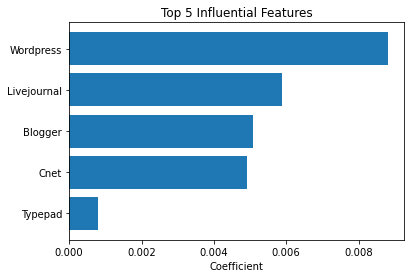

In [190]:
# Create a function to plot the top k influential features
def plot_top_k_features(feature_coef_list, k=5):
    feature_names, coefficients = zip(*feature_coef_list)
    plt.barh(range(k), coefficients, align='center')
    plt.yticks(range(k), feature_names)
    plt.xlabel('Coefficient')
    plt.title(f'Top {k} Influential Features')
    plt.gca().invert_yaxis()
    plt.show()

# Plot the top 5 influential features
plot_top_k_features(top_features, k=5)